#### Mason Manca
#### CPSC 323
#### Dr.Morehead
#### 15 September 2022
<h3><center> Project 2: Linear Regression<center/><h3/>

In [1]:
import pandas as pd
import time as tm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
class Model():
    def __init__(self):
        self.X_train = self.y_train = self.X_test = self.y_test = self.df_binary = []
        self.timeOfModel = 0
        self.y_pred = 0
    
    def split_into_sets(self,df):
        self.df_binary = df[['Head Size(cm^3)','Brain Weight(grams)']]
        # Separating the data into independent and dependent variables
        # Converting each dataframe into a numpy array 
        X = np.array(self.df_binary['Head Size(cm^3)']).reshape(-1, 1)
        y = np.array(self.df_binary['Brain Weight(grams)']).reshape(-1, 1)
        
      
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.8) # 80% Test size
    
    def plot_and_test(self, df):
        
        # Splitting the data into training and testing data
        regr = LinearRegression()   
        regr.fit(self.X_train, self.y_train)
        sns.lmplot(x ="Head Size(cm^3)", y ="Brain Weight(grams)", data = df[['Head Size(cm^3)','Brain Weight(grams)']], ci = None ) # plot graph with data
        print("Fitting model to training data:")
        plt.show()
        
        # Begin testing of data
        plt.clf() # clear graph
        t0 = tm.time() # Start of the clock to determine performance
        self.y_pred = regr.predict(self.X_test)
        self.timeOfModel = tm.time() - t0 # Calculation of performance speed
        
        plt.scatter(self.X_test, self.y_test, color ='b')
        plt.plot(self.X_test, self.y_pred, color ='k')
        print("Testing Regression model")
        plt.show()
        print("coefficient of determination score: ", regr.score(self.X_test, self.y_test))
        print("Our correlation remains true through our model")
        
    def threshold_and_analysis(self):
        TP = TN = FP = FN = 0
        total = 238
        # We can only recieve false positives and true positives since we are predicting a decimal value
        # for accuracy within a range
        for i in range(len(self.y_pred)): 
            if(self.y_pred[i] <= (self.y_test[i] + 100) and (self.y_pred[i] >= self.y_test[i] - 100)):
                TP += 1
            else:
                FP += 1
        print("Accuracy: ", round((TP/total),2))

        # F1 score: F1 = 2 * (precision * recall) / (precision + recall)

        precision = TP/(TP + FP) # in this case because of the model TP/(TP+FP)
        recall = TP/(TP + FN)

        F1_score = 2 * ((precision * recall) / (precision + recall))
        print("F1 Score: ", round(F1_score,2))

        print("Speed of Model (s): ", round(self.timeOfModel,9))
        


As we can see, there is a somewhat linear correlation between head size and brain weight. 
Fitting model to training data:


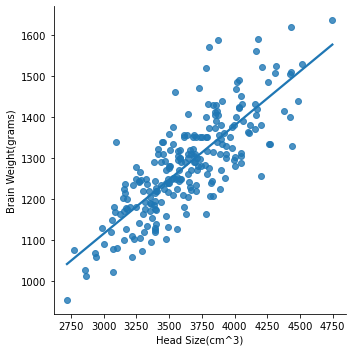

Testing Regression model


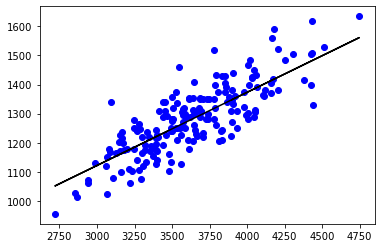

coefficient of determination score:  0.665758878970515
Our correlation remains true through our model


In [3]:
# Cell for output of data and time calculation
model = Model()

df = pd.read_csv('brain_weight.csv')

print("As we can see, there is a somewhat linear correlation between head size and brain weight. ")
model.split_into_sets(df)
model.plot_and_test(df)



##### Analysis
Note: It does not make sense to compute accuracy from a linear regression, as there is no classification to determine the TP,NP,TN,NT statistics. Very rarely are predictions the exact value that our models suspect them to be, so in this case I am going to add a threshold of about 100 grams.


In [4]:
model.threshold_and_analysis()
print("Confusion Matrix: ")

Accuracy:  0.7
F1 Score:  0.93
Speed of Model (s):  8.7738e-05
Confusion Matrix: 


|       | Predicted (0)  | Predicted (238)|
| ----------- | ----------- |----------- |
|Actual (NA)| TN    (0)   | FP (90)    |
|Actual (NA)| FN    (0)   | TP  (148)   |